# COGS 108 - Final Project (change this to your project's title)

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [  ] NO - keep private

# Overview

*Fill in your overview here*

# Names
- Nathan Ahmann
- Alex Guan
- Alan Miyazaki
- Renaldy Herlim

<a id='research_question'></a>
# Research Question

Does crime happen more or less frequently around police stations and can that knowledge be used to more effectively distribute police station locations?

<a id='background'></a>

## Background & Prior Work

Los Angeles has solidified itself as a historic city in America, with positive connotations such as art and film, along with negative ones such as crime rate. The latter has especially had an impact on the culture surrounding the city, as policing of the area has only grown to be more controversial. The city has observed a wide variety of crimes, ranging from petty theft to mass shootings. Due to how controversial the policing of the country has been, especially with the increasing prevalence of movements like BLM, Los Angeles has had the effectiveness of its law enforcement questioned. NPR discusses this topic during Planet Money: "When You Add More Police To A City, What Happens?"[^NPR], which explores how effective mass policing is for cities with varying levels of crime. Economists appear to have evidence that increasing the police force for the average city helps to prevent crime overall, but this is not observed in certain areas with a larger Black population. While there is an increase in arrests for lower level crimes, it seems that the homicide rate is effectively left unchanged. The article points to areas in the South and Midwest with this description, so our group wanted to consider the West Coast and specifically Los Angeles.

The Violence Project[^Violence] takes a comprehensive look at mass shootings from around the country in the past sixty years, with a total of 187 up to March 2021. The database contains over 200 different variables to preview, allowing someone to explore motivations, weapons, background, etc. The website directly provides the ability to filter through the list of shooters, and additionally contains statistics on how prevalent they are in the data. This project in particular is focused exclusively on mass shootings and contains less than 200 rows of data (thankfully), so we decided to expand our project to all forms of crime within LA county.

With all of the former in mind, we settled on investigating how the proximity of police stations may impact the crime in certain parts of Los Angeles. A common train of thought is that less crime would happen around police stations because they would act as deterents against crime. One related study found that crime rate increased around areas where a police station closed [^blesse]. They suggested that this supported previous papers claiming that more police stations are effective at detering crime, but that the measurement of deterence is hard to calculate. Another paper found more some actual numbers, stating that police stations in Buenos Aires created a 500-600m zone of decreased crime [^fondevila]. This is more in line with what we would like to investigate. By considering location data, we can see if police station prescene has any effects on the number of crimes or on the types of crimes commited.

[^blesse] Blesse, S., &amp; Diegmann, A. (2022). The place-based effects of police stations on crime: Evidence from station closures. Journal of Public Economics, 207, 104605. https://doi.org/10.1016/j.jpubeco.2022.104605 

[^fondevila] Fondevila, G., Vilalta-Perdomo, C., Galindo Pérez, M. C., &amp; Cafferata, F. G. (2021). Crime deterrent effect of police stations. Applied Geography, 134, 102518. https://doi.org/10.1016/j.apgeog.2021.102518 

[^NPR] Rosalsky, G. (2021, April 20). When you add more police to a city, what happens? NPR. Retrieved March 5, 2023, from https://www.npr.org/sections/money/2021/04/20/988769793/when-you-add-more-police-to-a-city-what-happens 

[^Violence] Most comprehensive mass shooter database. The Violence Project. (2023, January 31). Retrieved March 5, 2023, from https://www.theviolenceproject.org/mass-shooter-database/ 

# Hypothesis



We believe that less crime will happen closer to police stations which would imply that the presence of a police station deters crime. If criminal activity happens less around police stations then it would be important to effectively spread out police stations in order to minimize crime rate as a whole.

# Dataset(s)

### Dataset 1: Los Angeles Police Station Location
[Link to dataset](https://geohub.lacity.org/datasets/lapd-police-stations)  
Number of observations: 21

This dataset contains information on all 21 of LA City's Police Stations. If we find that our crime data extends past the city or want a more precise location, then we might make use of the extended data for LA county that includes more Police Stations and additioanlly includes Sheriff stations.

Each row of the dataset contains information for one police station.  
The relevant columns are:
* DIVISION - the division the police station is under
* LOCATION - an address for the police station. Since we would rather have a more precise location we might convert these to latitude/longitude or use the alternative dataset.
* PREC - the precinct each station is in charge of 


#### Alternate Dataset that is for the entire LA county and includes Sheriff Stations:  
[Link to alternate dataset](https://geohub.lacity.org/datasets/lacounty::sheriff-and-police-stations)  
Number of observations: 105

This dataset contains information on 105 of LA County's Police and Sheriff Stations. It contains more data than the above dataset, but some of the information might not be necessary so we listed it as an alternative.

Each row of the dataset contains information for one police or sheriff station.  
The relevant columns are:
* cat3 - Category 3 has a distinction between sheriff and police stations
* latitude, longitude - self explanatory
* addrln1 - address line 1 contains an address we could use for locaiton instead of latitude, longitude
* city - Contains the city so we could narrow it down to LA city


### Dataset 2: Los Angeles Crime Data from 2020 to Present (March 1st 2023)  
[Link to dataset](https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8) 
  
Number of observations: 673,367 

This dataset includes information on crimes that took place in Los Angeles between 2020 and March 1st 2023.
Since Dataset 2 and 3 have the same columns, the row information and relevant column is below.

### Dataset 3: Los Angeles Crime Data from 2010 to 2019
[Link to dataset](https://data.lacity.org/Public-Safety/Crime-Data-from-2010-to-2019/63jg-8b9z)
  
Number of observations: 2,119,797 

This dataset includes information on crimes that took place in Los Angeles between 2010 and 2019.  

Each row represents a single crime that took place.
The relevant columns are:
* DR_NO - Divisions of Records number. Acts as an unique ID for the crime
* DATE_OCC - The date that the crime occured
* AREA - contains the geographic area code for the police station. These are 1-21 and correspond to 1 of the 21 police stations.
* Crm Cd Desc - description of the criminal code. Essentially a human readable crime category
* LOCATION - street address the crime took place at
* LAT, LONG - latitude and longitude

### Combining the Datasets

Dataset 1 will be our police station information so it will stay as it's own dataset. In our analysis we will use it in conjunction with the other datasets via location data, which will likely be latitude/longitude.

Dataset 2 and 3 contain our crime data. Due to coming from the same source, they are quite easy to combine and contain the same columns so we can simply concatenate them together.

# Setup

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime

import geopandas as gpd

from sklearn.cluster import KMeans

# Data Cleaning

Since the two crime datasets were from the same organization (LAPD), the two sets were really easy to combine. The only change that needed to be done was that the dataset from 2010-2019 had a space in column name for Area while the dataset for 2020-present did not. Aside from this, all other columns were the same and the datasets were easily combined.

In [14]:
# Reading datasets from two different time periods

# https://data.lacity.org/Public-Safety/Crime-Data-from-2010-to-2019/63jg-8b9z
past_df = pd.read_csv("Crime_Data_from_2010_to_2019.csv", dtype = {"TIME OCC": str})
# https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8
present_df = pd.read_csv("Crime_Data_from_2020_to_Present.csv", dtype = {"TIME OCC": str})

LAPD_df = pd.read_csv("LAPD_Police_Stations.csv")

# past dataset has column name typo
past_df = past_df.rename(columns={"AREA ": "AREA"})

# Both datasets use the same columns 
df = pd.concat([past_df, present_df])

The crime dataset had quite a few columns that were unnecessary to us. Mainly these were columns containing codes that law enforcement used internally. However, these columns usually had a description column in the dataset so the code column was unnecessary for us. The only exception were Mocodes and Part 1-2 which are internally used codes but did not contain an associated description column. However after looking into what these codes meant, it was decided that they did not provide any use to us and were removed. In addition to this, we also removed Date Rptd, date crime was reported, since we only care about when the crime occured and not when it was reported. We also replaced the codes in Vict Descent with their actual descriptions that was provided in the site the dataset came from.

In [15]:
# Dropping code columns since these are internal use and we don't get much 
# value from them given we have their description in a seperate column
df = df.drop(columns=[
    "Crm Cd", "Crm Cd 1", "Crm Cd 2", "Crm Cd 3", 
    "Crm Cd 4", "Premis Cd", "Weapon Used Cd", 
    "Mocodes", "Part 1-2", "Status", "Date Rptd"
    ])

# Changed code to be readable description
df["Vict Descent"] = df["Vict Descent"].replace({
                            "A": "Other Asian", 
                            "B": "Black", 
                            "C": "Chinese", 
                            "D": "Cambodian", 
                            "F": "Filipino", 
                            "G": "Guamanian", 
                            "H": "Hispanic/Latin/Mexican", 
                            "I": "American Indian/Alaskan Native", 
                            "J": "Japanese", 
                            "K": "Korean", 
                            "L": "Laotian", 
                            "O": "Other", 
                            "P": "Pacific Islander", 
                            "S": "Samoan", 
                            "U": "Hawaiian", 
                            "V": "Vietnamese", 
                            "W": "White", 
                            "X": "Unknown", 
                            "Z": "Asian Indian",
                        })

Additionally, we noticed that some of the longitudes and latitudes weren't in Los Angeles when we tried to plot them. Specifically a lot of data was at 0,0. While we could possibly figure out an estimated longitude and latitude since they still had data in the location column, we instead decided to drop them since there was not a large amount.

In [16]:
before_size = df.shape[0]
df = df.drop(df.loc[df['LAT'] < 10].index)
df = df.drop(df.loc[df['LON'] > -10].index)
after_size = df.shape[0]
print('Before: ', before_size)
print('After: ', after_size)
print('Dropped',before_size - after_size,'rows, which is',(before_size - after_size) / before_size,'% of the entire dataset')

Before:  2793164
After:  2787053
Dropped 6111 rows, which is 0.0021878414586468963 % of the entire dataset


Lastly, we needed to clean up the date and time columns

add datetime conversion
maybe rename some columns for neatness/readability

To combine our geospatial datasets and make them work with our crime dataset, we had to rename some columns and do some merges. First, we changed the X, Y system used on the LAPD dataset to longitude, latitude to match the crime dataset naming convention.

Additionally, we had to make use of geopandas to read in the precinct area data. This dataset just contains shapes and areas for each precinct and is used for plotting and area data.

In [17]:
# Renamed X,Y to Longitude, Latitude
LAPD_df = LAPD_df.rename(columns={
    "X": "Longitude", 
    "Y": "Latitude"
    })

dont forget to redo dataset section on final ver to add in new map dataset. Didn't have previously but need for plotting  

Later on in our EDA and analysis we do some additional operations that could be considered data cleaning. These were done for calculated fields or for specific plotting/analysis purposes. We left them in their own sections to make the code easier to follow and because our dataset at this point represents a cleaned dataset that others could use for their own purposes.

# Data Analysis & Results

Check to see if Longitude and Latitude make sense for LA area. (Originally included 0,0 values, now seems to include the expected area)

In [18]:
pd.DataFrame(columns=['Column','Min', 'Mean', 'Median', 'Max'], data=[
    ['LAT', df['LAT'].min(), df['LAT'].mean(), df['LAT'].median(), df['LAT'].max()],
    ['LON', df['LON'].min(), df['LON'].mean(), df['LON'].median(), df['LON'].max()]
])

,Column,Min,Mean,Median,Max
0,LAT,33.3427,34.077137,34.0617,34.7907
1,LON,-118.8279,-118.357856,-118.3279,-117.6596


Even after removing the 0,0 longitude latitude crimes, many crimes happen outside of the zone of any of the precincts (see the plot below). Since we plan to work with location data and clustering, these outliers will cause problems for our analysis. So we removed even more of the data to hone in on the area we truly care about, which is within the precinct boundaries.

<AxesSubplot: xlabel='Longitude', ylabel='Latitude'>

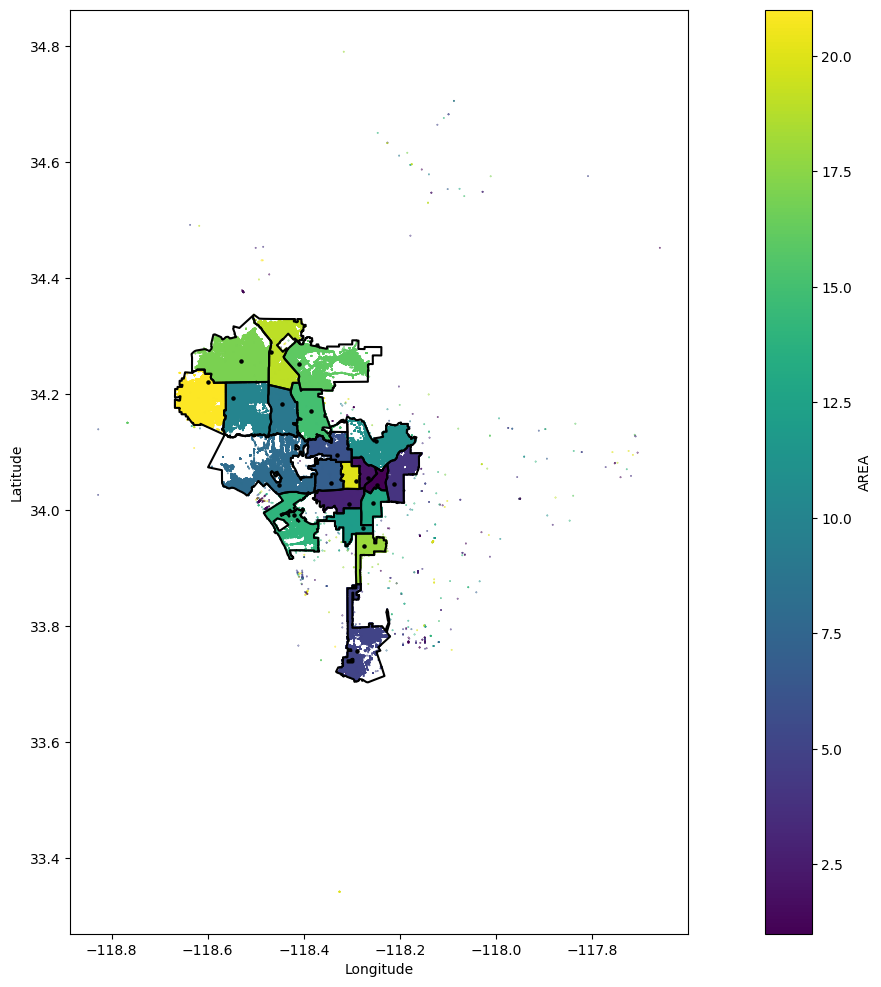

In [19]:
map_df = gpd.read_file('LAPD_Divisions.shp')

fig, ax = plt.subplots(1, figsize = (20, 12))
map_df.boundary.plot(color='black', ax=ax)
df.plot(ax=ax, x='LON', y='LAT', kind='scatter', c='AREA',  s=0.1, cmap='viridis')
LAPD_df.plot(ax=ax, x='Longitude', y='Latitude', kind='scatter', s=5, c='black')

In [20]:
# code snippet that could be useful later for determining better bounds
# map_df['geometry'].astype(str)\
#     .str[8:]\
#     .str.replace('(', '')\
#     .str.replace(')', '')\
#     .str.replace(',', '')\
#     .str.split(' ')

In [21]:
before_size = df.shape[0]

# arbitrarily chosen bounds for LA area
df = df.drop(df.loc[(df['LAT'] <= 33.7) & (df['LAT'] >= 34.37) & (df['LON'] <= -118.7) & (df['LON'] >= -118.15)].index)

after_size = df.shape[0]
print('Before: ', before_size)
print('After: ', after_size)
print('Dropped',before_size - after_size,'rows, which is',(before_size - after_size) / before_size,'% of the entire dataset')

Before:  2787053
After:  2787053
Dropped 0 rows, which is 0.0 % of the entire dataset


So now our dataset just contains the areas within the precinct and not a large area around them. This will help with our clustering and our analysis by removing outlier datapoints. These points outside the precinct boundaries seem randomly assigned to precincts or at least use a pattern that was not noted.

With this all finished we can plot the whole area again. Additionally we can add each of the latitudes and longitudes from the entire crime set.

<AxesSubplot: xlabel='Longitude', ylabel='Latitude'>

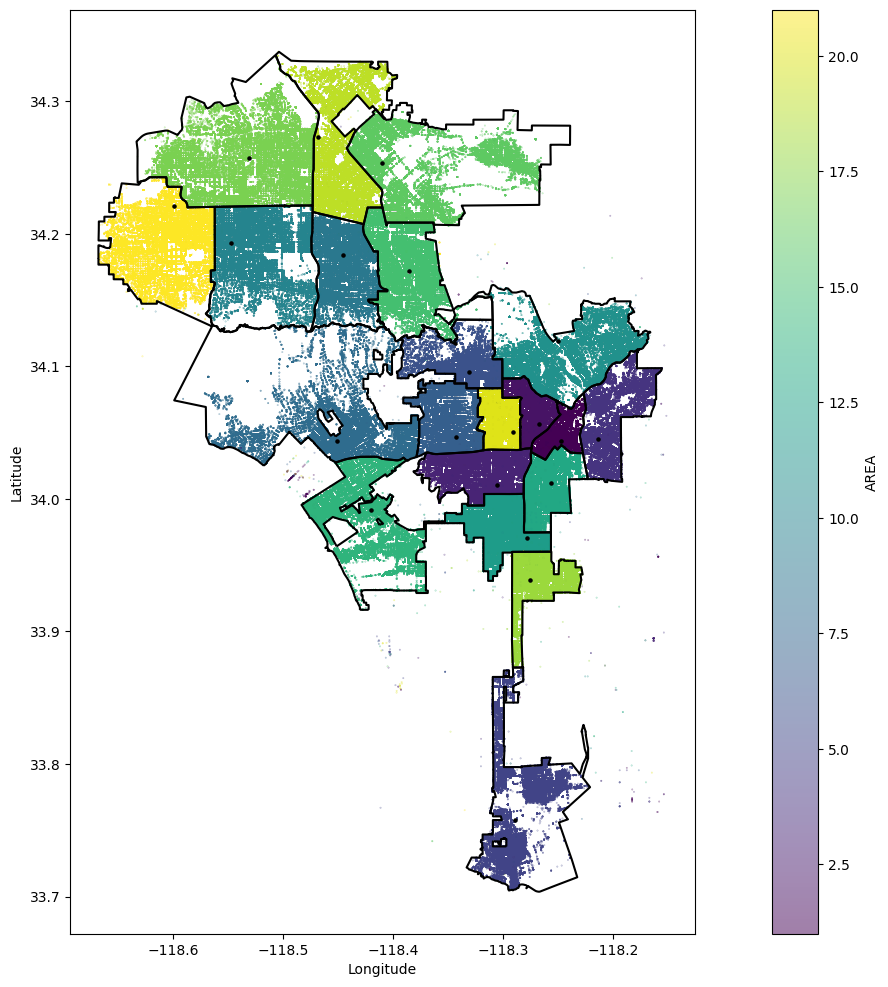

In [22]:
map_df = gpd.read_file('LAPD_Divisions.shp')
df_plot = df.loc[(df['LAT'] >= 33.7) & (df['LAT'] <= 34.37) & (df['LON'] >= -118.7) & (df['LON'] <= -118.15)]

fig, ax = plt.subplots(1, figsize = (20, 12))
map_df.boundary.plot(color='black', ax=ax)
df_plot.plot(ax=ax, x='LON', y='LAT', kind='scatter', c='AREA',  s=0.1, alpha=0.5, cmap='viridis')
LAPD_df.plot(ax=ax, x='Longitude', y='Latitude', kind='scatter', s=5, c='black')

So the crime distribution is largely containted within the precincts. The black dots are the police station locations themselves. A good thing to take note of is that the police stations are not centered in their respective zones. While some are roughly in the middle, there are also some on the edge of their zones. This is interesting since for effective coverage we would expect them to be centered so they can optimally cover their area. This will likely affect our analysis since our calculated locations will be centered on the crime around them and thus would likely be centered in their zones.

### Crime Counts in Relation to Precinct

Since our research question involves location information we want to focus our explorations around that. Specifically we would like to see if there are similar amounts of crimes commited in each precinct, if each precinct has similar areas, if each precinct has similar coverage.

First let's look at the number of crimes in each precinct.

One thing that we would be interested in knowing is if there is an equal distribution of crimes between police stations. From this we can see that there is a difference between how many cases each station has handled. This could either mean that some police stations are responsible for a larger area or there are more crimes happening in the areas those stations are covering.

<AxesSubplot: ylabel='APREC'>

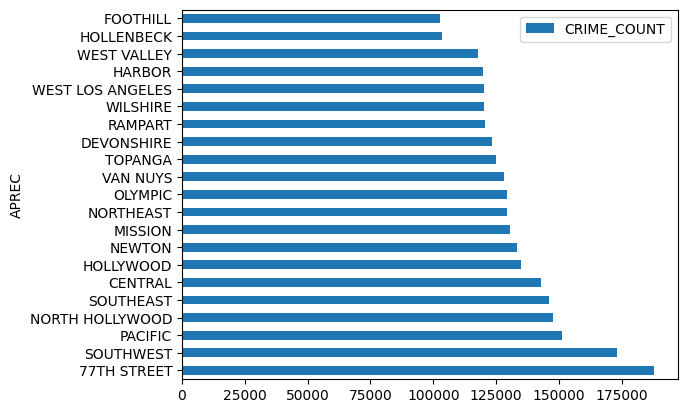

In [23]:
# setting up a merged crime count table that has counts and area of precincts using df and map_df
crime_counts = map_df.merge(df.groupby('AREA')[['DR_NO']].count().rename(columns={'DR_NO':'CRIME_COUNT'}), left_on='PREC', right_on='AREA')
crime_counts = crime_counts.sort_values(by='CRIME_COUNT', ascending=False)
crime_counts.plot(kind='barh', x='APREC', y='CRIME_COUNT')

While there are a few with less and a few with more it seems that there are similar amounts of crime commited in each precint.

But based on our map we know that the precint's are not all the same size, so can the differences in numbers of crime commited be related to size?

array([[<AxesSubplot: title={'center': 'Number of Crimes Committed'}, ylabel='APREC'>,
        <AxesSubplot: title={'center': 'Area of Precinct'}, ylabel='APREC'>,
        <AxesSubplot: title={'center': 'Number of Crimes Committed/ Area'}, ylabel='APREC'>]],
      dtype=object)

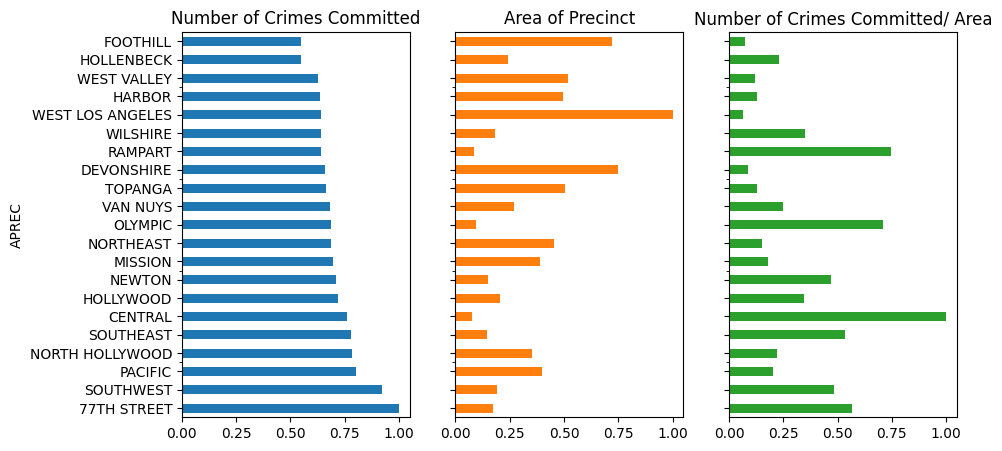

In [24]:
crime_counts['CRIME_COUNT_VS_AREA'] = crime_counts['CRIME_COUNT'] / crime_counts['AREA']

crime_counts['scaled_AREA'] = crime_counts['AREA'] / crime_counts['AREA'].max()
crime_counts['scaled_CRIME_COUNT'] = crime_counts['CRIME_COUNT'] / crime_counts['CRIME_COUNT'].max()
crime_counts['scaled_CRIME_COUNT_VS_AREA'] = crime_counts['CRIME_COUNT_VS_AREA'] / crime_counts['CRIME_COUNT_VS_AREA'].max()
crime_counts.plot(
    kind='barh', 
    x='APREC', 
    y=['scaled_CRIME_COUNT','scaled_AREA','scaled_CRIME_COUNT_VS_AREA'], 
    subplots=True, layout=(1,3), 
    figsize=(10, 5), 
    sharex=True, sharey=True,
    legend=False,
    title=['Number of Crimes Committed', 'Area of Precinct', 'Number of Crimes Committed/ Area']
)

All of the values have been scaled
The first bar chart is just the number of crimes commited in each area.
The second is the area of each precint.
The last bar chart is the number of crimes / the area of the precinct.
Since the axis are aligned each corresponds to the same area. So despite having an average number of crimes commited, the Central precinct has a very small area compared to the others and gets a higher value on the right bar chart. Since the bars on the right are not all the same size, then that means there is a disparity between the size of a precint and the number of crimes commited there.

#### ArcGIS Maximize Coverage Method
ArcGIS offers algorithms to chose the best locations for a certain goal, the "Choose Best Facilities" allows you to choose the best locations for facilities. The tool allocates locations with demand for the facilities in a way that satisfies the specified goal.

Our goal is to see if there could be better locations to place police stations so that crimes are evenly more distributed among stations. This algorithm maximizes the amount of demand covered within a specific time or distance of the facilities, in our case we are minimizing the driving time required from police stations to crimes in the area. 

Demand in our case is the amount of crime, and each demand location is where a crime occurs. For the purpose of simplifying the solution, we will pick an arbitrary type of crime and focus only on crimes that are labeled as "Attempted Robbery", and we will be using 2020-Present dataset. This goal chooses facilities such that the maximum amount of demand is allocated, with all the demand from each demand location allocated to the single facility closest to it.

In theory we should get the best places to place these stations geographically, but let's see how it does for distributing crimes evenly.

In [55]:
new_max_stations = pd.read_csv('new_maximized_stations.csv')
new_max_stations = new_max_stations[new_max_stations['Facility Type'] == "Chosen"]
new_max_stations.head()

,OBJECTID_1,Facility Type,Capacity,Demand Count,Allocated Demand,SourceID,SourceOID,PosAlong,SideOfEdge,SnapX,...,City_Owned_Property_hosted: Address1,City_Owned_Property_hosted: County,City_Owned_Property_hosted: City,City_Owned_Property_hosted: Longitude,City_Owned_Property_hosted: Latitude,City_Owned_Property_hosted: Council_Di,City_Owned_Property_hosted: Square_Foo,City_Owned_Property_hosted: Business_I,x,y
37,38,Chosen,2.147484e+09,46,46.0,1,8789510,0.833979,1,-118.458679,...,681 N VENICE BLVD,LOS ANGELES,LOS ANGELES,-118.458691,33.991178,11.0,0.000000,None,-118.458691,33.991178
42,43,Chosen,2.147484e+09,92,92.0,1,8806548,0.976399,1,-118.317160,...,5711 S VAN NESS AVE,LOS ANGELES,LOS ANGELES,-118.317436,33.990574,8.0,4532.788500,None,-118.317436,33.990574
48,49,Chosen,2.147484e+09,78,78.0,1,8811120,0.070907,2,-118.353100,...,2930 S LA BREA AVE,LOS ANGELES,LOS ANGELES,-118.352837,34.027832,10.0,4399.340300,None,-118.352837,34.027832
49,50,Chosen,2.147484e+09,119,119.0,1,8847107,0.912912,2,-118.267312,...,416 E MARTIN LUTHER KING JR BLVD,LOS ANGELES,LOS ANGELES,-118.267326,34.010864,9.0,3413.076587,None,-118.267326,34.010864
76,77,Chosen,2.147484e+09,109,109.0,1,8824942,0.403141,2,-118.247544,...,1525 E 103RD ST,LOS ANGELES,LOS ANGELES,-118.247544,33.943291,15.0,22564.000000,,-118.247544,33.943291


New locations of police stations generated by the Maximize Coverage method

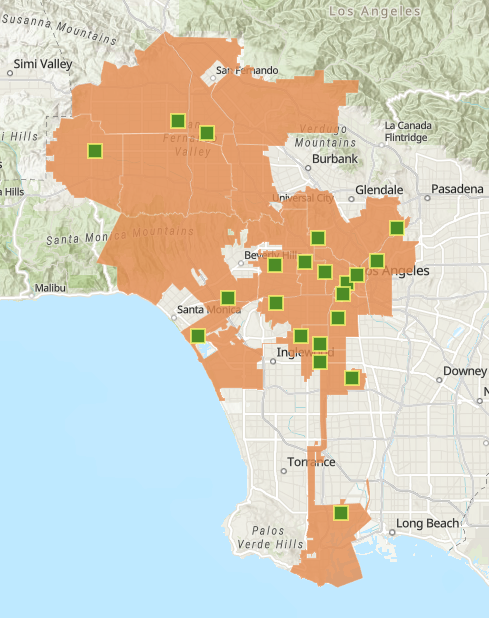

In [52]:
crime_locations = pd.read_csv('crime_attempted_robbery_locations.csv')

In [53]:
#Filter the crimes that are selected for the maximizing demand algorithm
list_facility_ids = list(new_max_stations['OBJECTID_1'].unique())
crime_locations = crime_locations[crime_locations['Assigned Facility ID'].isin(list_facility_ids)]

<AxesSubplot: >

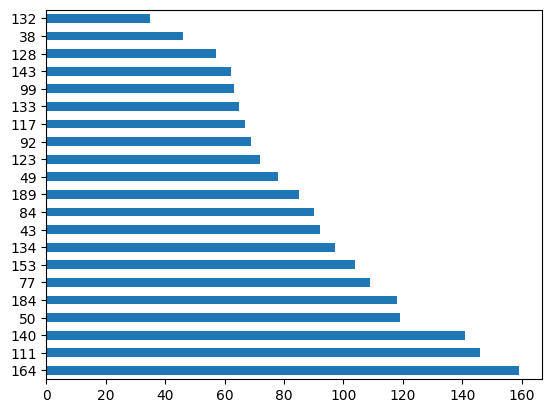

In [54]:
#Plot the counts of crimes for the new assigned police station locations
crime_locations['Assigned Facility ID'].value_counts().plot(kind='barh') #The assigned new location for that crime

### kmeans

Clustering the locations of where crimes occur will give us a general map of how the precints should be divided. In addition, the centers of the clusters would be the optimal locations to put police stations. In this case, we chose to use k-means clustering and we chose the number of clusters to be 21 since there are 21 police stations in LA. 

In [13]:
kmeans = KMeans(n_clusters=21)
kmeans.fit(df[["LON", "LAT"]])

KMeans(n_clusters=21)

After fitting K-means with the location data, we can then plot everything on a map of LA. In addition, we can also plot which cluster each point is part of which would relate to which station they belong to as well as mapping out the precinct lines.

<AxesSubplot: xlabel='Longitude', ylabel='Latitude'>

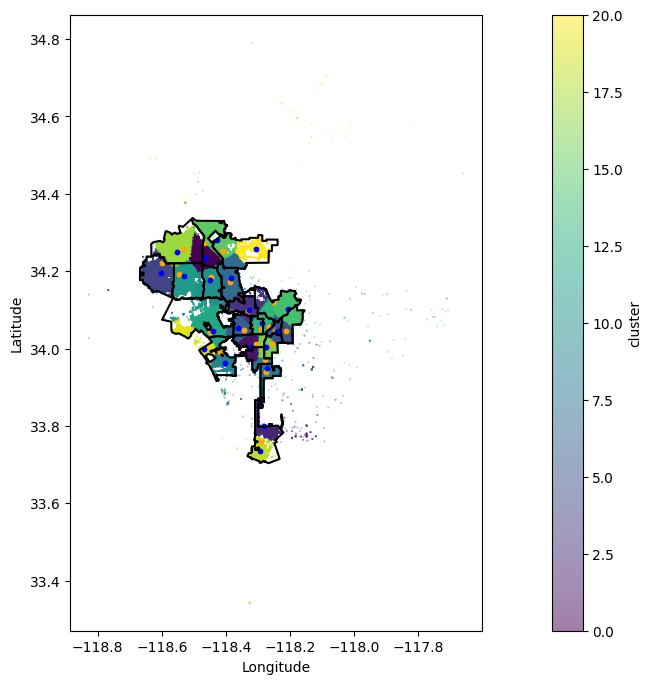

In [14]:
centers_df = pd.DataFrame(kmeans.cluster_centers_, columns=['Longitude', 'Latitude'])

map_df = gpd.read_file('LAPD_Divisions.shp')

fig, ax = plt.subplots(1, figsize = (18, 8))
map_df.boundary.plot(color='black', ax=ax)


# labeling each crime to a cluster
df["cluster"] = kmeans.predict(df[["LON", "LAT"]])
df.plot(ax=ax, x='LON', y='LAT', kind='scatter', c='cluster',  s=0.1, alpha=0.5, cmap='viridis')


LAPD_df.plot(ax=ax, x='Longitude', y='Latitude', kind='scatter', s=10, c='orange')
centers_df.plot(ax=ax, x='Longitude', y='Latitude', kind='scatter', s=10, c='blue') 

The graph shows two random dots and does not have a map of LA. This was due to some points being labeled as 0,0 which is why k-means made them into a cluster. To ammend this, we have to filter the coordinates so that they are mapped to the area of LA

In [15]:
df_plot = df.loc[(df['LAT'] >= 33.7) & (df['LAT'] <= 34.37) & (df['LON'] >= -118.7) & (df['LON'] <= -118.15)]

In [16]:
kmeans = KMeans(n_clusters=21)
kmeans.fit(df_plot[["LON", "LAT"]])

KMeans(n_clusters=21)

C:\Users\renal\AppData\Local\Temp\ipykernel_29400\2437674564.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot["cluster"] = kmeans.predict(df_plot[["LON", "LAT"]])


<AxesSubplot: xlabel='Longitude', ylabel='Latitude'>

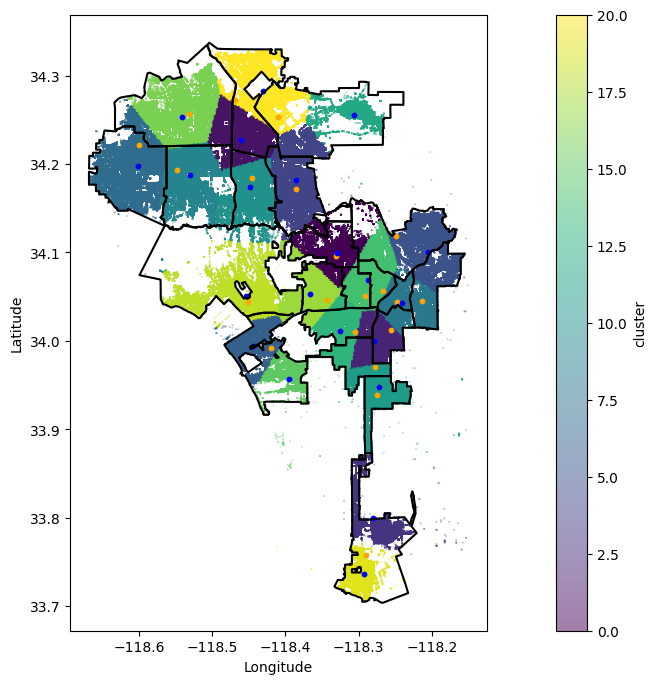

In [17]:
centers_df = pd.DataFrame(kmeans.cluster_centers_, columns=['Longitude', 'Latitude'])

fig, ax = plt.subplots(1, figsize = (18, 8))
map_df.boundary.plot(color='black', ax=ax)



df_plot["cluster"] = kmeans.predict(df_plot[["LON", "LAT"]])
df_plot.plot(ax=ax, x='LON', y='LAT', kind='scatter', c='cluster',  s=0.1, alpha=0.5, cmap='viridis')


LAPD_df.plot(ax=ax, x='Longitude', y='Latitude', kind='scatter', s=10, c='orange')
centers_df.plot(ax=ax, x='Longitude', y='Latitude', kind='scatter', s=10, c='blue') 

We can see that some centers from k-means are actually fairly close to actual police stations. In addition we can see borders of how each precint should be mapped based on k-means clustering.

Now we check if this has made the distribution of crime per station more even

<AxesSubplot: >

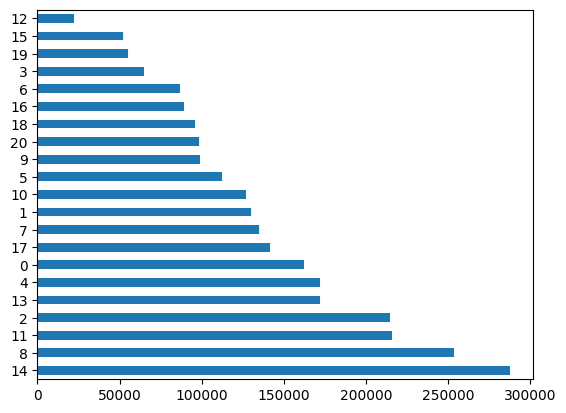

In [18]:
df_plot["cluster"].value_counts().plot(kind="barh")

<AxesSubplot: >

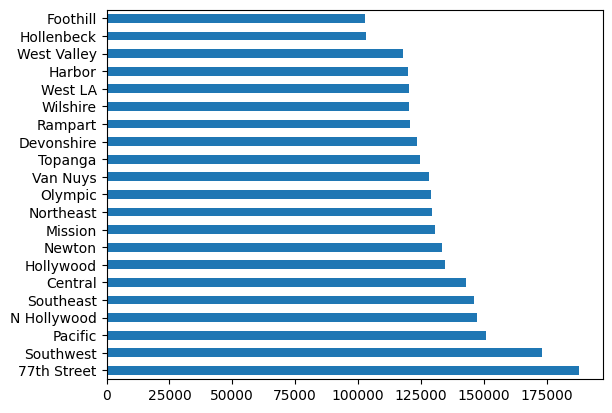

In [19]:
df_plot["AREA NAME"].value_counts().plot(kind="barh")

However, it seems that k-means has actually made the distribution worse as there are now larger differences between stations. K-means did not give us centers that would equally distribute crimes.

Another idea to try is maybe there are too much police stations in LA. What we can do is reduce the number of clusters k-means has to make.

In [20]:
def cluster_la_crime(num_clusters):
    kmeans = KMeans(n_clusters = num_clusters)
    kmeans.fit(df_plot[["LON", "LAT"]])

    centers_df = pd.DataFrame(kmeans.cluster_centers_, columns=['Longitude', 'Latitude'])

    fig, ax = plt.subplots(1, figsize = (18, 8))
    map_df.boundary.plot(color='black', ax=ax)



    df_plot["cluster"] = kmeans.predict(df_plot[["LON", "LAT"]])
    df_plot.plot(ax=ax, x='LON', y='LAT', kind='scatter', c='cluster',  s=0.1, alpha=0.5, cmap='viridis')


    LAPD_df.plot(ax=ax, x='Longitude', y='Latitude', kind='scatter', s=10, c='orange')
    centers_df.plot(ax=ax, x='Longitude', y='Latitude', kind='scatter', s=10, c='blue') 

    fig, ax = plt.subplots(1)
    df_plot["cluster"].value_counts().plot(kind="barh")

C:\Users\renal\AppData\Local\Temp\ipykernel_29400\2418307921.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot["cluster"] = kmeans.predict(df_plot[["LON", "LAT"]])
C:\Users\renal\AppData\Local\Temp\ipykernel_29400\2418307921.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot["cluster"] = kmeans.predict(df_plot[["LON", "LAT"]])
C:\Users\renal\AppData\Local\Temp\ipykernel_29400\2418307921.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

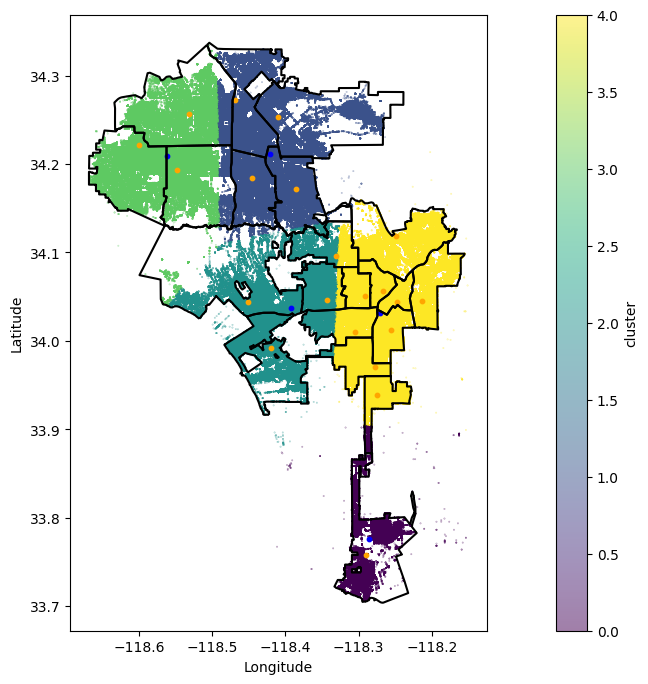

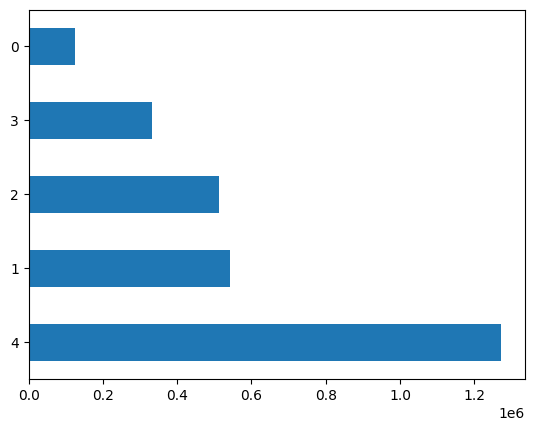

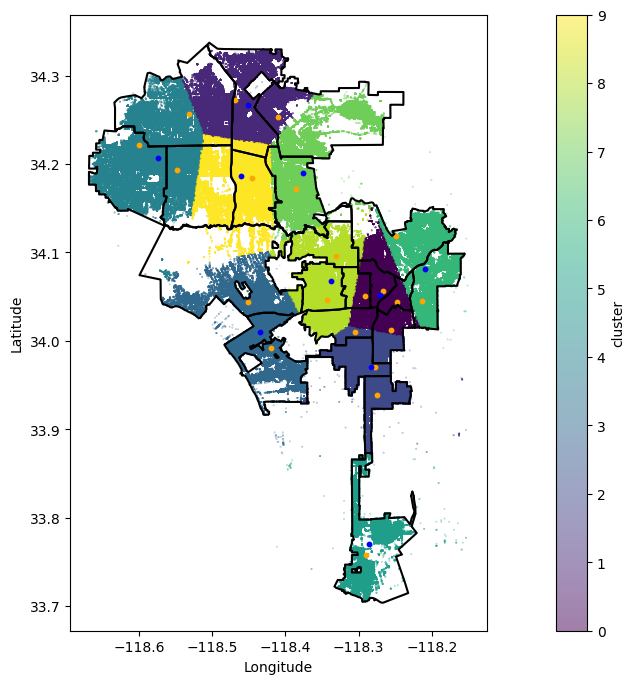

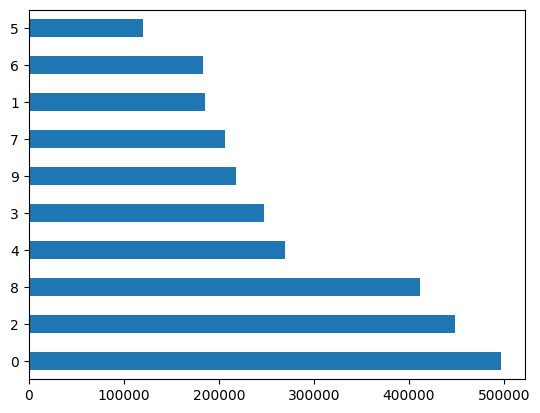

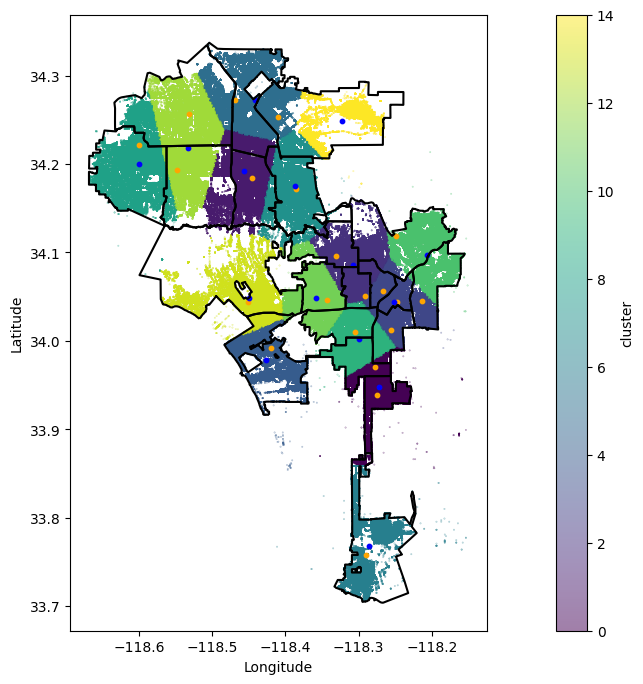

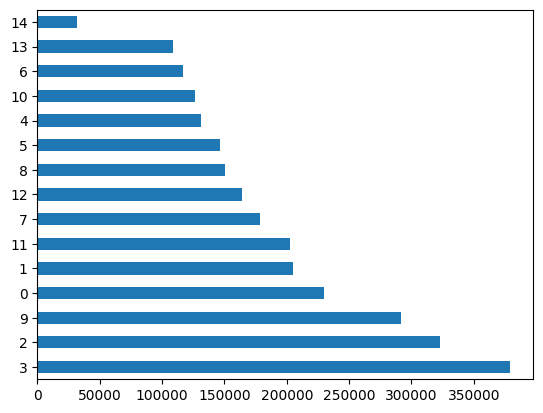

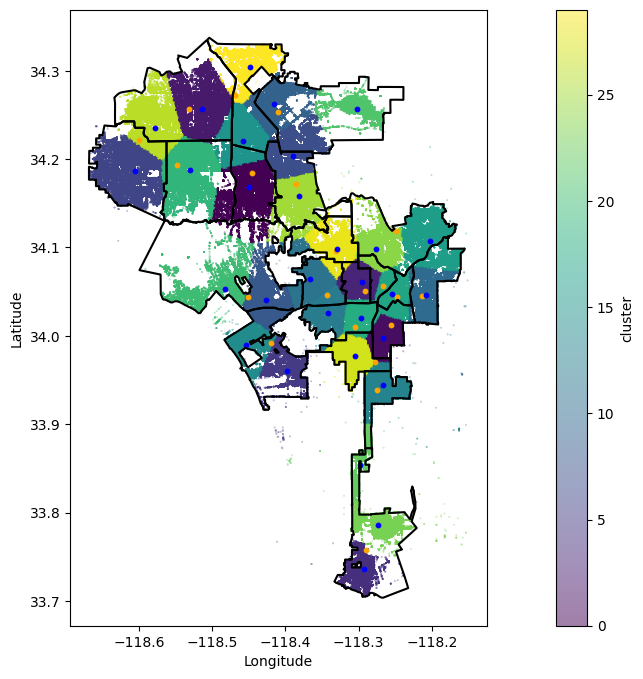

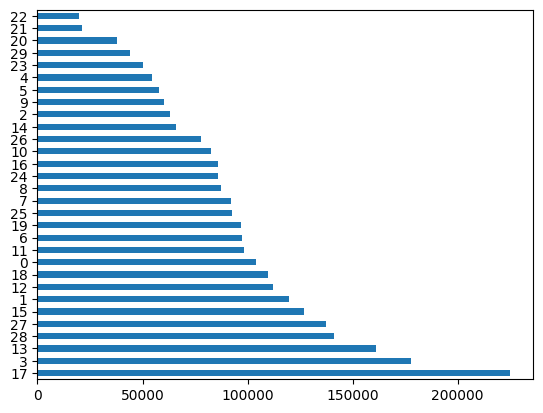

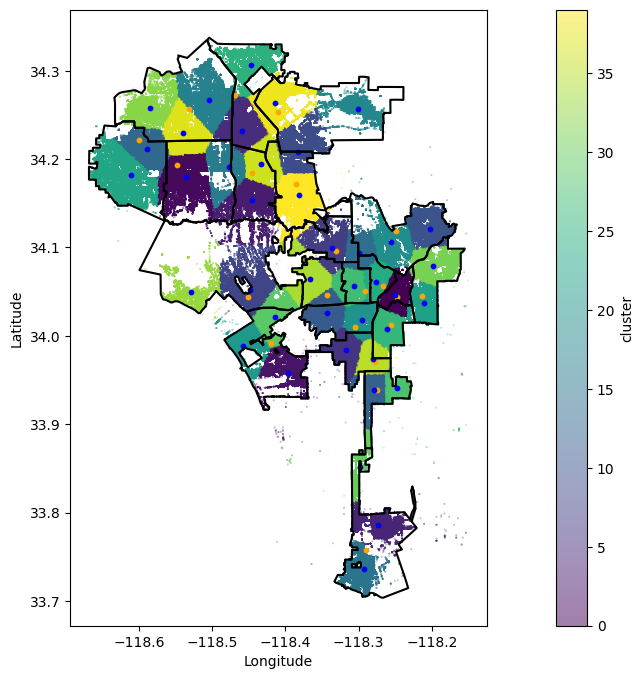

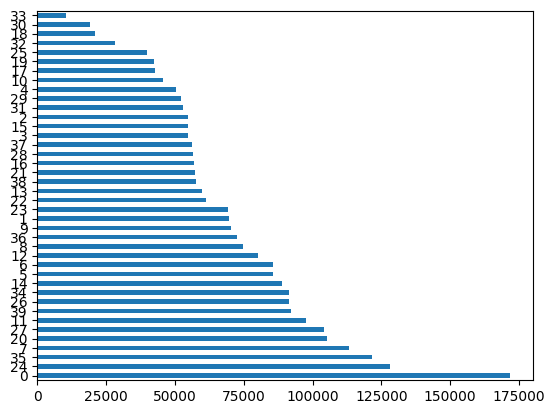

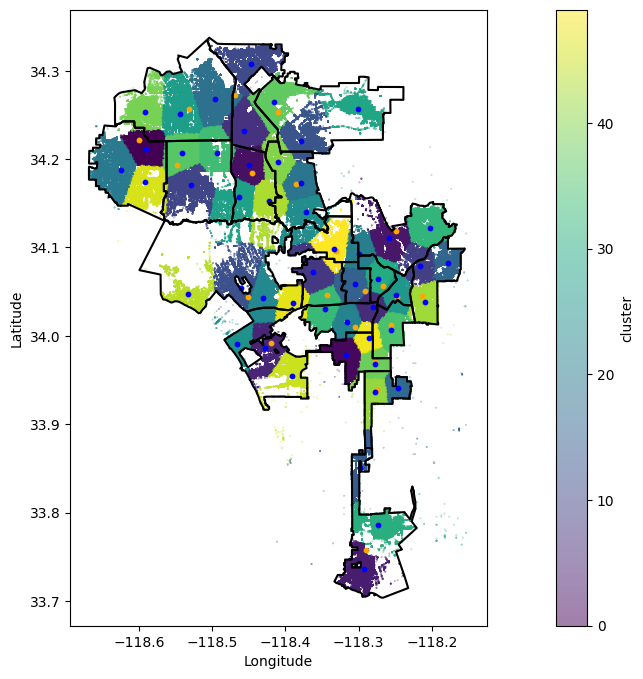

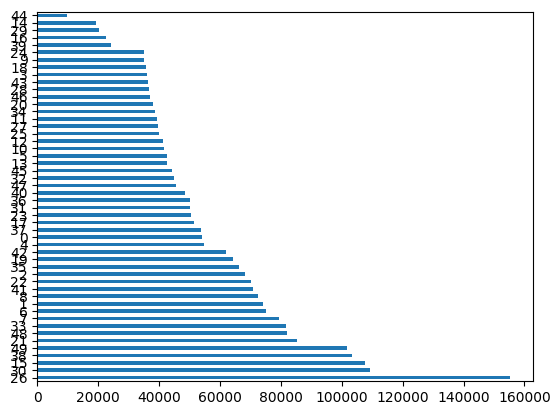

In [21]:
# decreasing centers 
cluster_la_crime(5)
cluster_la_crime(10)
cluster_la_crime(15)

# increasing centers
cluster_la_crime(30)
cluster_la_crime(40)
cluster_la_crime(50)

From the graphs, it seems that k-means will not give equal distributions of crime. 

# Ethics & Privacy

One of the main bias issues in our dataset, is that it only contains reported crimes. Since crimes must be reported by police officers, they inherently are linked to the prescence of a nearby police station. While we would expect this to increase volume of crimes reported nearby police stations, our hypothesis goes against that expectation by assuming that the deterence of a police station will outweight this effect. In order to address this we will carefully word our analysis descriptions and take this into account in our conclusions. 

Another potential bias in our dataset is that since it is only covering the area of Los Angeles and might not be representative of crime in general for the rest of the state/nation; furthermore, our data could also have an imbalanced proportion of populations due to the nature of policing and crime. In particular, the overpolicing of low income and minority areas could skew our analyses results and present problematic solutions. To tackle this problem, we will carefully analyze for these patterns in our dataset and point them out if/when they arise, as well as preface our solutions with a warning.

Privacy should be well protected because the records do not include the names of the victim or culprit. The only thing that links the crime to the people involved is the Division of Records Number serving as an ID of each crime. However only the Los Angeles Police Department has access to the records. In addition to this, the Los Angeles Police Department specified in the description that they round the addresses to the nearest hundred blocks to protect privacy.

# Conclusion & Discussion

*Fill in your discussion information here*

# Team Contributions

*Specify who in your group worked on which parts of the project.*